In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [228]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

In [4]:
df=pd.read_csv("amazon_alexa.tsv",sep="\t")

In [5]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### EDA

In [7]:
df.shape

(3150, 5)

In [18]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [20]:
df.shape

(3149, 5)

In [24]:
#Creating a new col to check the length of characters in 'verified_review' column
df['length']=df['verified_reviews'].apply(len)

In [26]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   length            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.2+ KB


In [30]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [36]:
df['rating'].value_counts()/df['rating'].value_counts().sum()*100

rating
5    72.594474
4    14.449031
1     5.112734
3     4.826929
2     3.016831
Name: count, dtype: float64

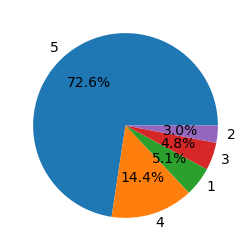

In [96]:
plt.figure(figsize=(3,3))
plt.pie(df['rating'].value_counts()/df['rating'].value_counts().sum()*100,labels=df['rating'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [100]:
df[df['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [102]:
df[df['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

So, we can consider 1&2 are negative ratings & 3,4,5 are possitive ratings

### Analyse feedback column

In [54]:
df['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [78]:
df[df['feedback']==0].iloc[1]['verified_reviews']

'Sound is terrible if u want good music too get a bose'

So, feedback 1 is possitive feedback & 0 means negative feedback

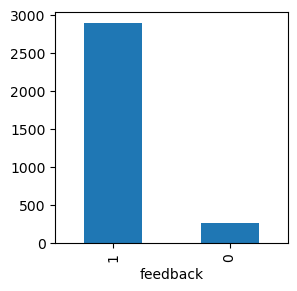

In [90]:
plt.figure(figsize=(3,3))
df['feedback'].value_counts().plot(kind='bar')
plt.show()

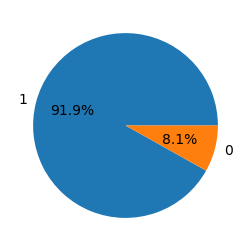

In [94]:
plt.figure(figsize=(3,3))
plt.pie(df['feedback'].value_counts()/df['feedback'].value_counts().sum()*100,labels=df['feedback'].value_counts().index,autopct='%1.1f%%')
plt.show()

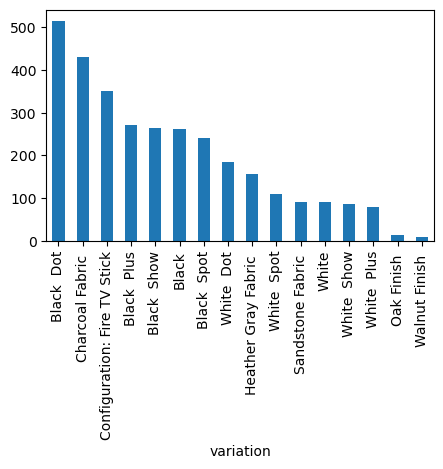

In [114]:
plt.figure(figsize=(5,3))
df['variation'].value_counts().plot(kind='bar')
plt.show()

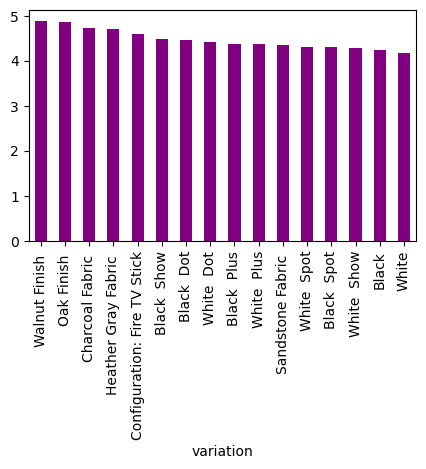

In [138]:
plt.figure(figsize=(5,3))
df.groupby('variation')['rating'].mean().sort_values(ascending=False).plot(kind='bar',color='purple')
plt.show()

As we checked 'White' has low average ratings & 'Walnut Finish' has high average ratings

In [144]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(df.verified_reviews)

### Check wordcloud for overall verified_reviews

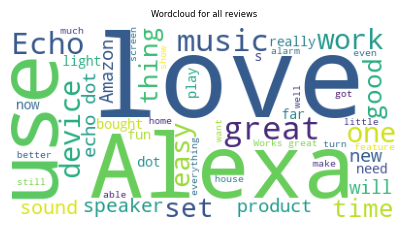

In [173]:
reviews=" ".join([review for review in df['verified_reviews']])
wc=WordCloud(background_color='white',max_words=50)
plt.figure(figsize=(5,5))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews' ,fontsize=6)
plt.axis('off')
plt.show()

### Check wordcloud for positive verified_reviews

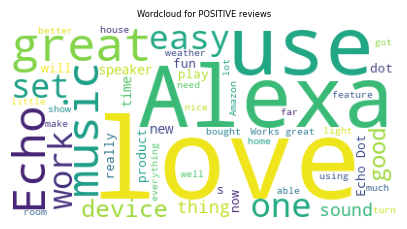

In [186]:
reviews=" ".join([review for review in df[df['feedback']==1]['verified_reviews']])
wc=WordCloud(background_color='white',max_words=50)
plt.figure(figsize=(5,5))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for POSITIVE reviews' ,fontsize=6)
plt.axis('off')
plt.show()

### Check wordcloud for negative verified_reviews

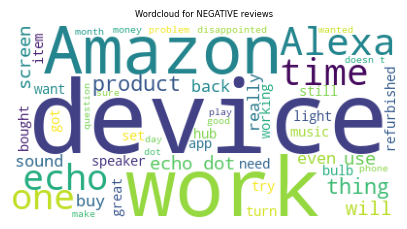

In [188]:
reviews=" ".join([review for review in df[df['feedback']==0]['verified_reviews']])
wc=WordCloud(background_color='white',max_words=50)
plt.figure(figsize=(5,5))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for NEGATIVE reviews' ,fontsize=6)
plt.axis('off')
plt.show()

### Preprocessing & Modelling

In [198]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in stopwords]
  review = ' '.join(review)
  corpus.append(review)

Using Count Vectorizer to create bag of words

In [205]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [240]:
import os
import pickle
# Ensure the 'Models' directory exists
os.makedirs('Models', exist_ok=True)

# Save the scaler object to the file
with open('Models/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [242]:
#Saving the Count Vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

Checking the shape of X and y

In [209]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [223]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


In [225]:
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [244]:
#Saving the scaler model
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

### Random Forest

In [230]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [231]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.946031746031746


In [234]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [236]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

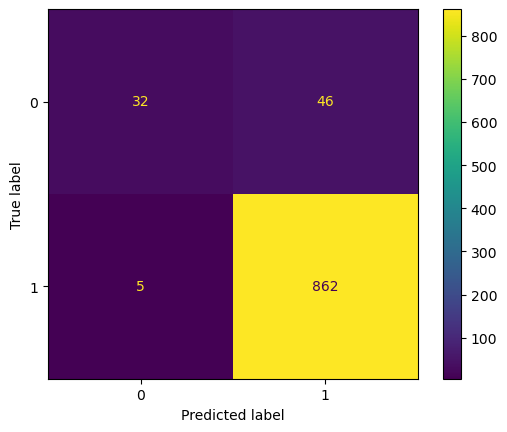

In [238]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [272]:
type(y_test)

numpy.ndarray

In [278]:
count_0, count_1 = np.sum(y_test == 0), np.sum(y_test == 1)
print({"0":count_0,"1":count_1})

{'0': 78, '1': 867}
